In [57]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random

import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms
import cv2

In [2]:
# invert
# histogram equalization/normalization check?
# compare to some nominal image
# histogram equalization wrt a traget image?
# source image to target?

# thresholding after
# glare easily identifiable

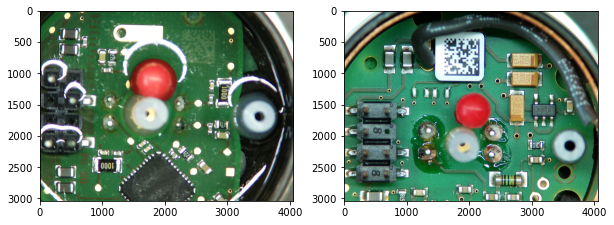

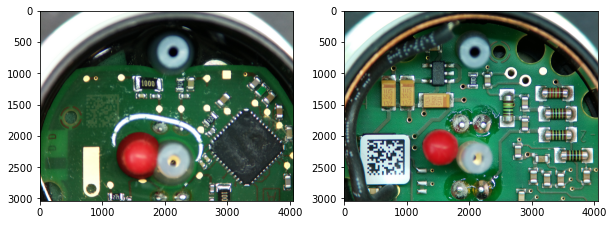

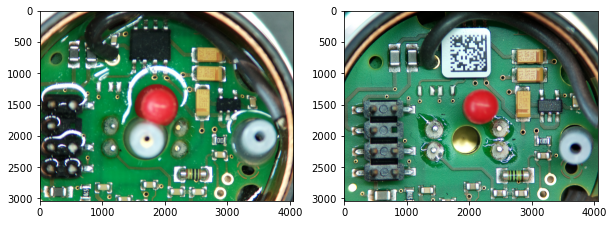

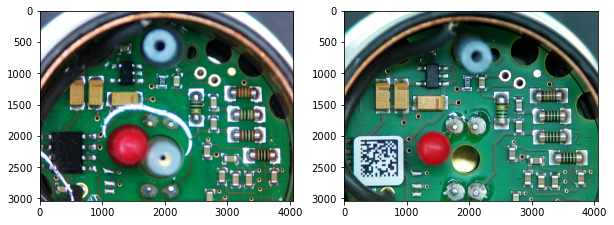

In [3]:
data_dir_good = 'Filling2/good'
data_dir_bad = 'Filling2/bad'

files_good = os.listdir(data_dir_good)
files_bad = os.listdir(data_dir_bad)

for file_good, file_bad in zip(files_good, files_bad):
    if file_good[-3:] == 'jpg' and file_bad[-3:] == 'jpg':
        img_good = cv2.imread(os.path.join(data_dir_good, file_good))
        img_bad = cv2.imread(os.path.join(data_dir_bad, file_bad))
        
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        axs[0].imshow(img_good[...,::-1])
        axs[1].imshow(img_bad[...,::-1])
        plt.show()

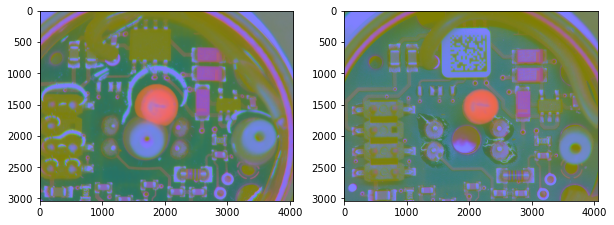

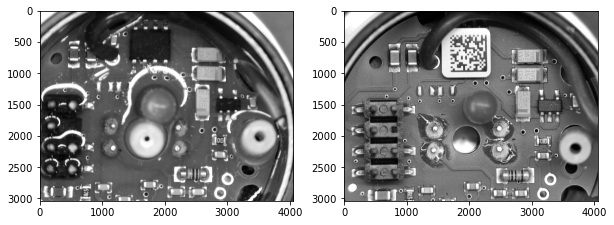

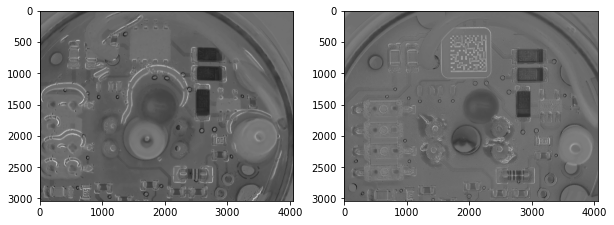

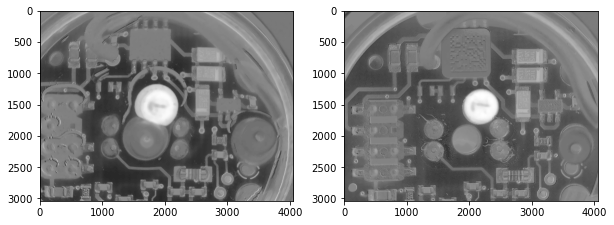

In [4]:
img_good = cv2.imread(os.path.join(data_dir_good, files_good[2]))
img_bad = cv2.imread(os.path.join(data_dir_bad, files_bad[2]))

img_good_yuv = cv2.cvtColor(img_good, cv2.COLOR_BGR2YUV)
img_bad_yuv = cv2.cvtColor(img_bad, cv2.COLOR_BGR2YUV)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(img_good_yuv[...,::-1])
axs[1].imshow(img_bad_yuv[...,::-1])
plt.show()

for i in range(3):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].imshow(img_good_yuv[:, :, i], cmap='gray')
    axs[1].imshow(img_bad_yuv[:, :, i], cmap='gray')
    plt.show()

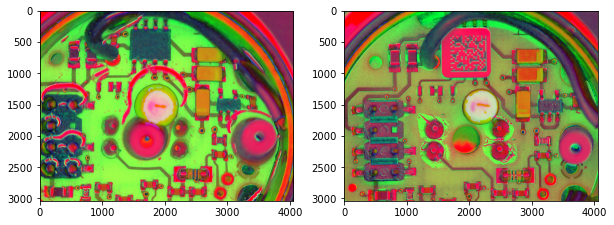

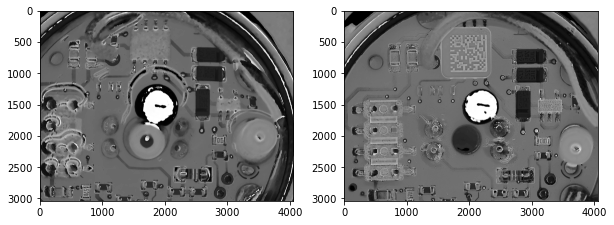

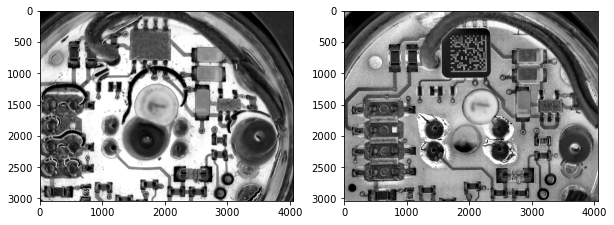

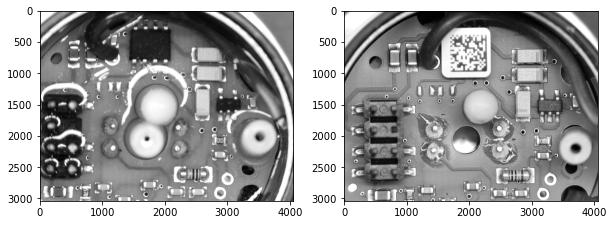

In [5]:
img_good_hsv = cv2.cvtColor(img_good, cv2.COLOR_BGR2HSV)
img_bad_hsv = cv2.cvtColor(img_bad, cv2.COLOR_BGR2HSV)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(img_good_hsv[...,::-1])
axs[1].imshow(img_bad_hsv[...,::-1])
plt.show()

for i in range(3):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].imshow(img_good_hsv[:, :, i], cmap='gray')
    axs[1].imshow(img_bad_hsv[:, :, i], cmap='gray')
    plt.show()

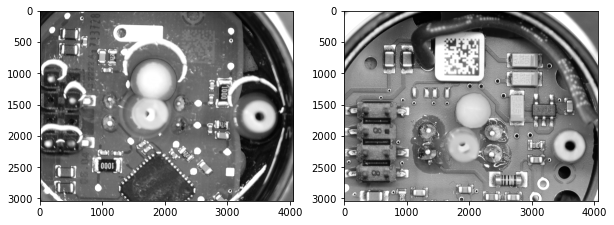

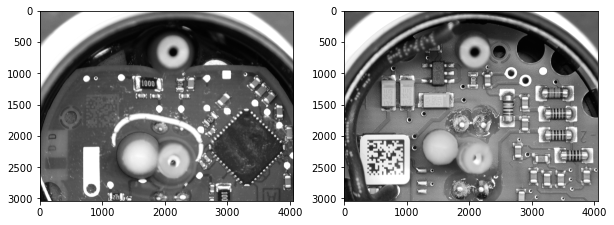

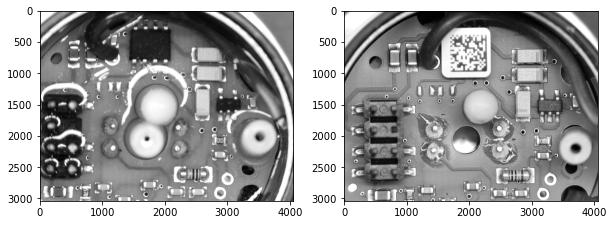

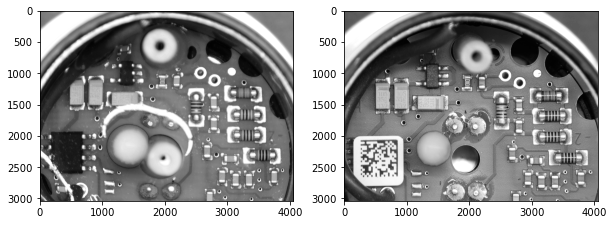

In [16]:
data_dir_good = 'Filling2/good'
data_dir_bad = 'Filling2/bad'

files_good = os.listdir(data_dir_good)
files_bad = os.listdir(data_dir_bad)

for file_good, file_bad in zip(files_good, files_bad):
    if file_good[-3:] == 'jpg' and file_bad[-3:] == 'jpg':
        img_good = cv2.imread(os.path.join(data_dir_good, file_good))
        img_bad = cv2.imread(os.path.join(data_dir_bad, file_bad))
        
        img_good_hsv = cv2.cvtColor(img_good, cv2.COLOR_BGR2HSV)
        img_bad_hsv = cv2.cvtColor(img_bad, cv2.COLOR_BGR2HSV)      
        
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        axs[0].imshow(img_good_hsv[:, :, 2], cmap='gray')
        axs[1].imshow(img_bad_hsv[:, :, 2], cmap='gray')
        plt.show()

In [21]:
vid_name = 'video2'
# os.system(f"ffmpeg -find_stream_info -i D:/E+H/Glue_Detection/Filling2/good/{vid_name}.h264 -map 0 -codec copy -codec:s mov_text D:/E+H/Glue_Detection/Filling2/good/{vid_name}.mp4")

0

In [ ]:
from __future__ import print_function
import cv2
import argparse

max_value_S = 255
max_value_V = 255
max_value_H = 360//2


window_capture_name = 'Video Capture'
window_detection_name = 'Object Detection'
low_H_name = 'Low H'
low_S_name = 'Low S'
low_V_name = 'Low V'
high_H_name = 'High H'
high_S_name = 'High S'
high_V_name = 'High V'
def on_low_H_thresh_trackbar(val):
    global low_H
    global high_H
    low_H = val
    low_H = min(high_H-1, low_H)
    cv2.setTrackbarPos(low_H_name, window_detection_name, low_H)
def on_high_H_thresh_trackbar(val):
    global low_H
    global high_H
    high_H = val
    high_H = max(high_H, low_H+1)
    cv2.setTrackbarPos(high_H_name, window_detection_name, high_H)
def on_low_S_thresh_trackbar(val):
    global low_S
    global high_S
    low_S = val
    low_S = min(high_S-1, low_S)
    cv2.setTrackbarPos(low_S_name, window_detection_name, low_S)
def on_high_S_thresh_trackbar(val):
    global low_S
    global high_S
    high_S = val
    high_S = max(high_S, low_S+1)
    cv2.setTrackbarPos(high_S_name, window_detection_name, high_S)
def on_low_V_thresh_trackbar(val):
    global low_V
    global high_V
    low_V = val
    low_V = min(high_V-1, low_V)
    cv2.setTrackbarPos(low_V_name, window_detection_name, low_V)
def on_high_V_thresh_trackbar(val):
    global low_V
    global high_V
    high_V = val
    high_V = max(high_V, low_V+1)
    cv2.setTrackbarPos(high_V_name, window_detection_name, high_V)
# parser = argparse.ArgumentParser(description='Code for Thresholding Operations using inRange tutorial.')
# parser.add_argument('--camera', help='Camera divide number.', default=0, type=int)
# args = parser.parse_args()

# cap = cv2.VideoCapture(args.camera)
video_loc = 'D:/E+H/Glue_Detection/Filling2/good/video2.mp4'
cap = cv2.VideoCapture(video_loc)

if (cap.isOpened()== False): 
    print("Error opening video stream or file")

cv2.namedWindow(window_capture_name)
cv2.namedWindow(window_detection_name)
cv2.createTrackbar(low_H_name, window_detection_name , low_H, max_value_H, on_low_H_thresh_trackbar)
cv2.createTrackbar(high_H_name, window_detection_name , high_H, max_value_H, on_high_H_thresh_trackbar)
cv2.createTrackbar(low_S_name, window_detection_name , low_S, max_value_S, on_low_S_thresh_trackbar)
cv2.createTrackbar(high_S_name, window_detection_name , high_S, max_value_S, on_high_S_thresh_trackbar)
cv2.createTrackbar(low_V_name, window_detection_name , low_V, max_value_V, on_low_V_thresh_trackbar)
cv2.createTrackbar(high_V_name, window_detection_name , high_V, max_value_V, on_high_V_thresh_trackbar)
while True:
    
    ret, frame = cap.read()
    if frame is None:
        break
    frame_HSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    frame_threshold = cv2.inRange(frame_HSV, (low_H, low_S, low_V), (high_H, high_S, high_V))
    
    cv2.imshow(window_capture_name, cv2.resize(frame, (960, 540)))
    cv2.imshow(window_detection_name, cv2.resize(frame_threshold, (960, 540)))

    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
        
cv2.destroyAllWindows()

In [46]:
from __future__ import print_function
import cv2
import argparse

max_value_S = 255
max_value_V = 255
max_value_H = 360//2

window_capture_name = 'Video Capture'
window_detection_name = 'Object Detection'
low_H_name = 'Low H'
low_S_name = 'Low S'
low_V_name = 'Low V'
high_H_name = 'High H'
high_S_name = 'High S'
high_V_name = 'High V'
def on_low_H_thresh_trackbar(val):
    global low_H
    global high_H
    low_H = val
    low_H = min(high_H-1, low_H)
    cv2.setTrackbarPos(low_H_name, window_detection_name, low_H)
def on_high_H_thresh_trackbar(val):
    global low_H
    global high_H
    high_H = val
    high_H = max(high_H, low_H+1)
    cv2.setTrackbarPos(high_H_name, window_detection_name, high_H)
def on_low_S_thresh_trackbar(val):
    global low_S
    global high_S
    low_S = val
    low_S = min(high_S-1, low_S)
    cv2.setTrackbarPos(low_S_name, window_detection_name, low_S)
def on_high_S_thresh_trackbar(val):
    global low_S
    global high_S
    high_S = val
    high_S = max(high_S, low_S+1)
    cv2.setTrackbarPos(high_S_name, window_detection_name, high_S)
def on_low_V_thresh_trackbar(val):
    global low_V
    global high_V
    low_V = val
    low_V = min(high_V-1, low_V)
    cv2.setTrackbarPos(low_V_name, window_detection_name, low_V)
def on_high_V_thresh_trackbar(val):
    global low_V
    global high_V
    high_V = val
    high_V = max(high_V, low_V+1)
    cv2.setTrackbarPos(high_V_name, window_detection_name, high_V)

cv2.namedWindow(window_capture_name)
cv2.namedWindow(window_detection_name)
cv2.createTrackbar(low_H_name, window_detection_name , low_H, max_value_H, on_low_H_thresh_trackbar)
cv2.createTrackbar(high_H_name, window_detection_name , high_H, max_value_H, on_high_H_thresh_trackbar)
cv2.createTrackbar(low_S_name, window_detection_name , low_S, max_value_S, on_low_S_thresh_trackbar)
cv2.createTrackbar(high_S_name, window_detection_name , high_S, max_value_S, on_high_S_thresh_trackbar)
cv2.createTrackbar(low_V_name, window_detection_name , low_V, max_value_V, on_low_V_thresh_trackbar)
cv2.createTrackbar(high_V_name, window_detection_name , high_V, max_value_V, on_high_V_thresh_trackbar)
while True:
    img_good = cv2.imread(os.path.join(data_dir_good, files_good[3]))
    frame_HSV = cv2.cvtColor(img_good, cv2.COLOR_BGR2HSV)
    frame_HSV = match_histograms(frame_HSV, reference, channel_axis=-1)
    frame_threshold = cv2.inRange(frame_HSV, (low_H, low_S, low_V), (high_H, high_S, high_V))
    
    cv2.imshow(window_capture_name, cv2.resize(img_good, (960, 540)))
    cv2.imshow(window_detection_name, cv2.resize(frame_threshold, (960, 540)))

    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
        
cv2.destroyAllWindows()

In [28]:
(low_H, low_S, low_V), (high_H, high_S, high_V)

((0, 90, 180), (180, 255, 255))

In [3]:
# red plastic

low_H = 0
low_S = 90
low_V = 180

high_H = 180
high_S = 255
high_V = 255

In [43]:
# white plastic

# low_H = 80
# low_S = 10
# low_V = 194

# high_H = 120
# high_S = 135
# high_V = 240

# # works for all bad
low_H = 87
low_S = 30
low_V = 184

high_H = 110
high_S = 115
high_V = 225

In [6]:
# red plastic

low_H_r = 0
low_S_r = 140
low_V_r = 180

high_H_r = 180
high_S_r = 255
high_V_r = 255


# white plastic

low_H_w = 80
low_S_w = 10
low_V_w = 185

high_H_w = 120
high_S_w = 135
high_V_w = 240

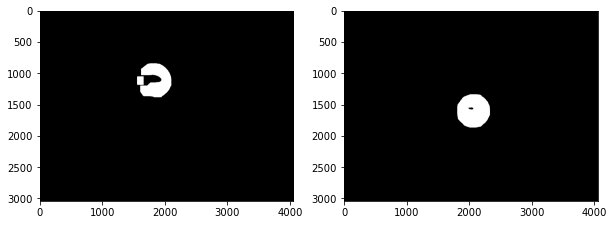

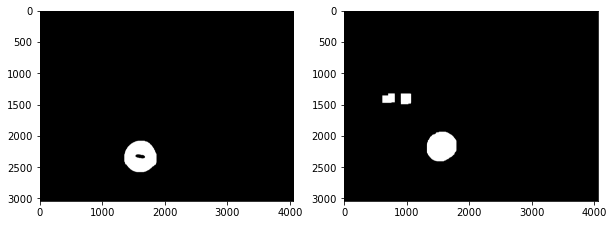

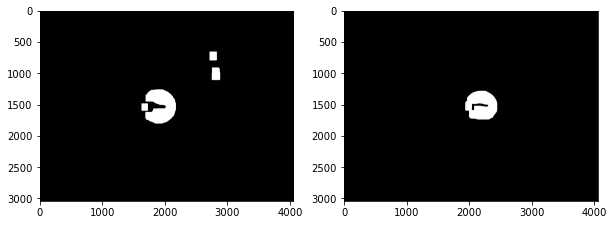

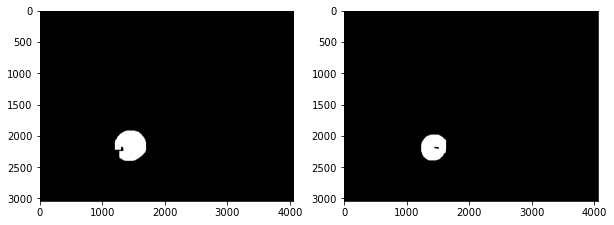

In [7]:
data_dir_good = 'Filling2/good'
data_dir_bad = 'Filling2/bad'

files_good = os.listdir(data_dir_good)
files_bad = os.listdir(data_dir_bad)

for file_good, file_bad in zip(files_good, files_bad):
    if file_good[-3:] == 'jpg' and file_bad[-3:] == 'jpg':
        img_good = cv2.imread(os.path.join(data_dir_good, file_good))
        img_bad = cv2.imread(os.path.join(data_dir_bad, file_bad))
        
        img_good_HSV = cv2.cvtColor(img_good, cv2.COLOR_BGR2HSV)
        img_bad_HSV = cv2.cvtColor(img_bad, cv2.COLOR_BGR2HSV)
        
        img_good_threshold = cv2.inRange(img_good_HSV, (low_H_r, low_S_r, low_V_r), (high_H_r, high_S_r, high_V_r))
        img_bad_threshold = cv2.inRange(img_bad_HSV, (low_H_r, low_S_r, low_V_r), (high_H_r, high_S_r, high_V_r))
        
        kernel = np.ones((10, 10),np.uint8)
        opening_good = cv2.morphologyEx(img_good_threshold, cv2.MORPH_CLOSE, kernel)
        opening_bad = cv2.morphologyEx(img_bad_threshold, cv2.MORPH_CLOSE, kernel)
        
        kernel = np.ones((100, 100),np.uint8)
        opening_good = cv2.morphologyEx(opening_good, cv2.MORPH_OPEN, kernel)
        opening_bad = cv2.morphologyEx(opening_bad, cv2.MORPH_OPEN, kernel)
        
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        axs[0].imshow(opening_good, cmap='gray')
        axs[1].imshow(opening_bad, cmap='gray')
        plt.show()

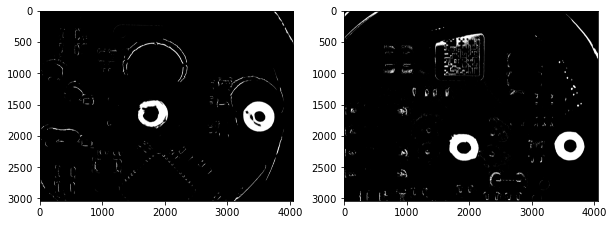

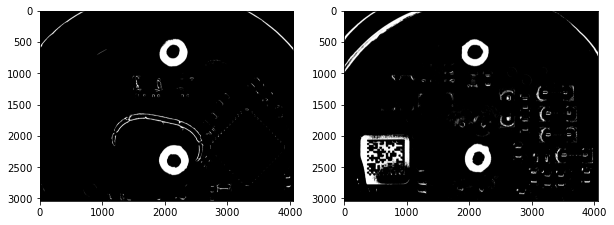

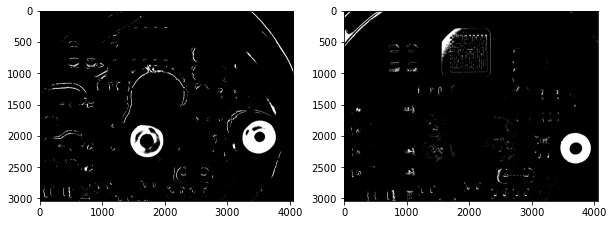

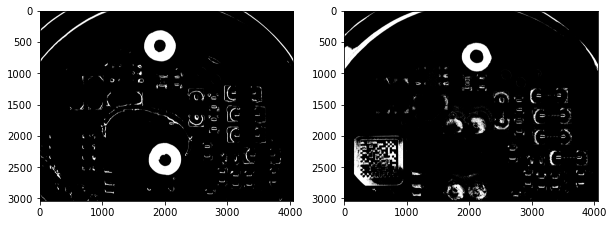

In [8]:
data_dir_good = 'Filling2/good'
data_dir_bad = 'Filling2/bad'

files_good = os.listdir(data_dir_good)
files_bad = os.listdir(data_dir_bad)

for file_good, file_bad in zip(files_good, files_bad):
    if file_good[-3:] == 'jpg' and file_bad[-3:] == 'jpg':
        img_good = cv2.imread(os.path.join(data_dir_good, file_good))
        img_bad = cv2.imread(os.path.join(data_dir_bad, file_bad))
        
        img_good_HSV = cv2.cvtColor(img_good, cv2.COLOR_BGR2HSV)
        img_bad_HSV = cv2.cvtColor(img_bad, cv2.COLOR_BGR2HSV)
        
        img_good_threshold = cv2.inRange(img_good_HSV, (low_H_w, low_S_w, low_V_w), (high_H_w, high_S_w, high_V_w))
        img_bad_threshold = cv2.inRange(img_bad_HSV, (low_H_w, low_S_w, low_V_w), (high_H_w, high_S_w, high_V_w))
        
        kernel = np.ones((5, 5),np.uint8)
        opening_good = cv2.morphologyEx(img_good_threshold, cv2.MORPH_OPEN, kernel)
        opening_good = cv2.morphologyEx(opening_good, cv2.MORPH_CLOSE, kernel)
        
        kernel = np.ones((5, 5),np.uint8)
        opening_bad = cv2.morphologyEx(img_bad_threshold, cv2.MORPH_OPEN, kernel)
        opening_bad = cv2.morphologyEx(opening_bad, cv2.MORPH_CLOSE, kernel)
        
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        axs[0].imshow(img_good_threshold, cmap='gray')
        axs[1].imshow(img_bad_threshold, cmap='gray')
        plt.show()

In [9]:
import cv2
import numpy as np
  
# Read image.
img = cv2.imread(os.path.join(data_dir_bad, files_bad[1]))
  
# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))
  
# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred, 
                   cv2.HOUGH_GRADIENT, 1, 500, param1 = 100,
               param2 = 40, minRadius = 150, maxRadius = 300)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv2.circle(img, (a, b), r, (0, 255, 0), 2)
  
        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
        cv2.imshow("Detected Circle", cv2.resize(img, (800, 800)))
        cv2.waitKey(0)
        cv2.destroyAllWindows()

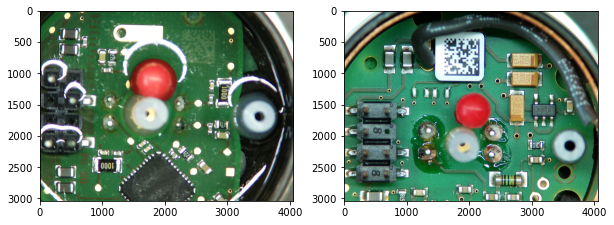

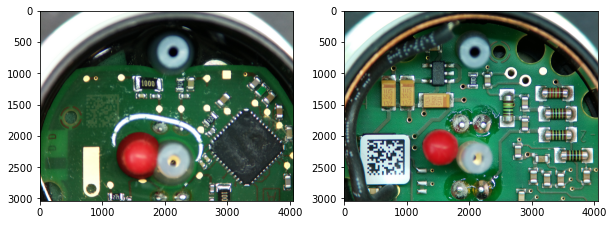

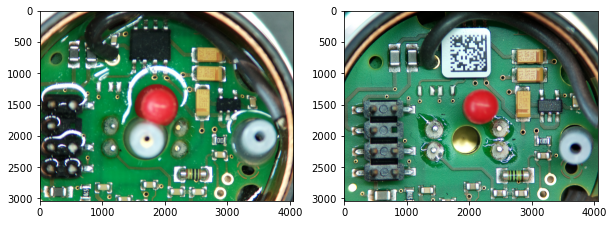

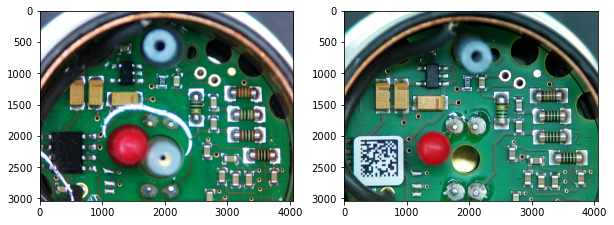

In [6]:
data_dir_good = 'Filling2/good'
data_dir_bad = 'Filling2/bad'

files_good = os.listdir(data_dir_good)
files_bad = os.listdir(data_dir_bad)

for file_good, file_bad in zip(files_good, files_bad):
    if file_good[-3:] == 'jpg' and file_bad[-3:] == 'jpg':
        img_good = cv2.imread(os.path.join(data_dir_good, file_good))
        img_bad = cv2.imread(os.path.join(data_dir_bad, file_bad))
        
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        axs[0].imshow(img_good[...,::-1])
        axs[1].imshow(img_bad[...,::-1])
        plt.show()

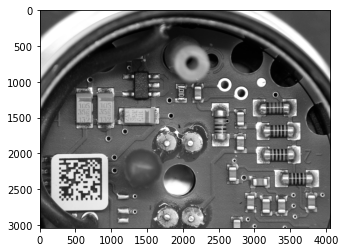

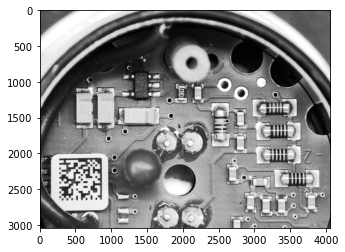

In [24]:
img_good = cv2.imread(os.path.join(data_dir_bad, files_bad[3]))
src = cv2.cvtColor(img_good, cv2.COLOR_BGR2GRAY)
dst = cv2.equalizeHist(src)

plt.imshow(src, cmap='gray')
plt.show()
plt.imshow(dst, cmap='gray')
plt.show()

No of Channel is: 3
No of Channel is: 3


C:\Users\kazim\AppData\Local\Temp\ipykernel_24040\3834718326.py:24: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched = match_histograms(image, reference ,


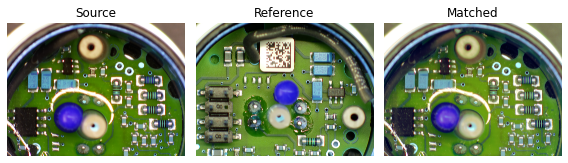

In [32]:
# import packages
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms
import cv2

# reading main image
img1 = cv2.imread(os.path.join(data_dir_good, files_good[3]))
# img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)[:, :, 0]
  
# checking the number of channels
print('No of Channel is: ' + str(img1.ndim))
  
# reading reference image
img2 = cv2.imread(os.path.join(data_dir_bad, files_bad[0]))
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)[:, :, 0]

# checking the number of channels
print('No of Channel is: ' + str(img2.ndim))
  
image = img1
reference = img2
  
matched = match_histograms(image, reference ,
                           multichannel=True)
  

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, 
                                    figsize=(8, 3),
                                    sharex=True, sharey=True)
  
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')
  
plt.tight_layout()
plt.show()
  
# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
  
# for i, img in enumerate((image, reference, matched)):
#     for c, c_color in enumerate(('red', 'green', 'blue')):
#         img_hist, bins = exposure.histogram(img[..., c], 
#                                             source_range='dtype')
#         axes[c, i].plot(bins, img_hist / img_hist.max())
#         img_cdf, bins = exposure.cumulative_distribution(img[..., c])
#         axes[c, i].plot(bins, img_cdf)
#         axes[c, 0].set_ylabel(c_color)

# axes[0, 0].set_title('Source')
# axes[0, 1].set_title('Reference')
# axes[0, 2].set_title('Matched')
  
# plt.tight_layout()
# plt.show()

No of Channel is: 3
No of Channel is: 3


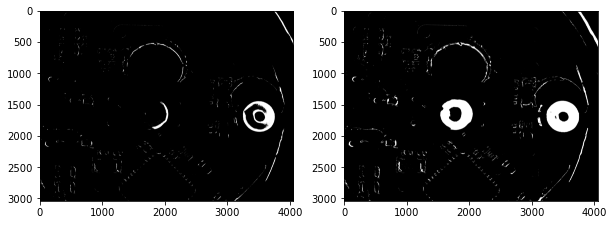

No of Channel is: 3


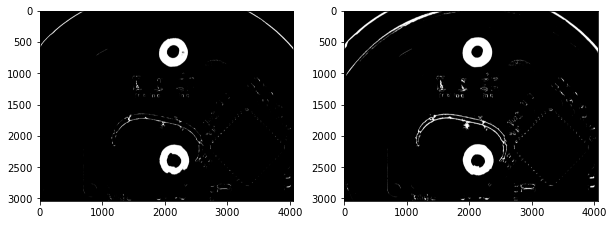

No of Channel is: 3


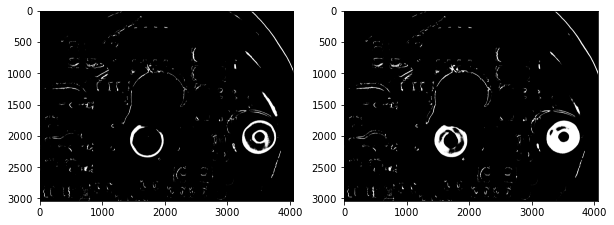

No of Channel is: 3


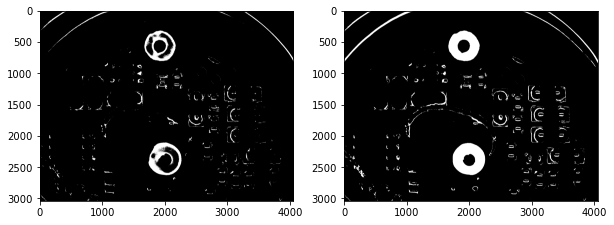

In [55]:
# works for all bad
low_H_w = 75
low_S_w = 20
low_V_w = 174

high_H_w = 110
high_S_w = 115
high_V_w = 225

# import packages
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms
import cv2
  
# reading reference image
img2 = cv2.imread(os.path.join(data_dir_bad, files_bad[0]))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
# [:, :, 0]

# checking the number of channels
print('No of Channel is: ' + str(img2.ndim))

for ind in range(len(files_good)):
    if files_good[ind][-3:] == 'jpg':
#     print(f'{ind}/{len(files_good)}')
    # reading main image
        img1 = cv2.imread(os.path.join(data_dir_good, files_good[ind]))
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
        # [:, :, 0]

        # checking the number of channels
        print('No of Channel is: ' + str(img1.ndim))

        image = img1
        reference = img2

        matched = match_histograms(image, reference, channel_axis=-1)


        image = cv2.inRange(image, (low_H_w, low_S_w, low_V_w), (high_H_w, high_S_w, high_V_w))
        matched = cv2.inRange(matched, (low_H_w, low_S_w, low_V_w), (high_H_w, high_S_w, high_V_w))


        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        axs[0].imshow(image, cmap='gray')
        axs[1].imshow(matched, cmap='gray')
        plt.show()

No of Channel is: 3
No of Channel is: 3


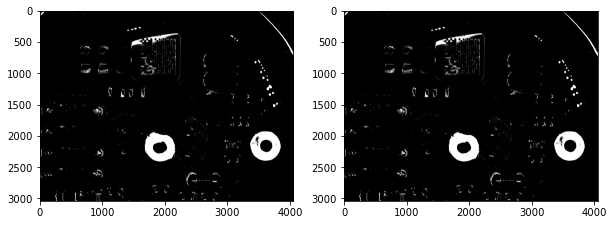

No of Channel is: 3


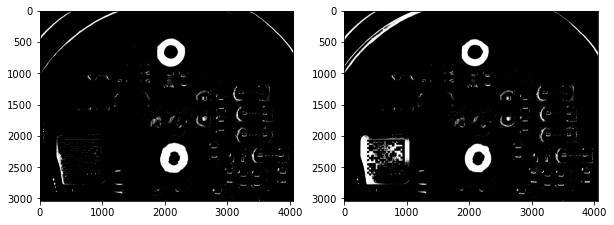

No of Channel is: 3


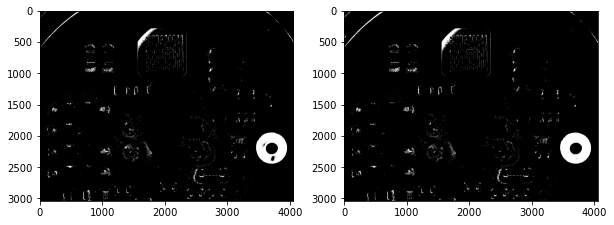

No of Channel is: 3


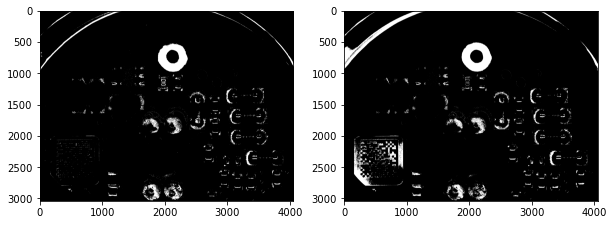

In [54]:
# works for all bad
low_H_w = 75
low_S_w = 20
low_V_w = 174

high_H_w = 110
high_S_w = 115
high_V_w = 225

# import packages
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms
import cv2
  
# reading reference image
img2 = cv2.imread(os.path.join(data_dir_bad, files_bad[0]))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
# [:, :, 0]

# checking the number of channels
print('No of Channel is: ' + str(img2.ndim))

for ind in range(len(files_good)):
    if files_bad[ind][-3:] == 'jpg':
#     print(f'{ind}/{len(files_good)}')
    # reading main image
        img1 = cv2.imread(os.path.join(data_dir_bad, files_bad[ind]))
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
        # [:, :, 0]

        # checking the number of channels
        print('No of Channel is: ' + str(img1.ndim))

        image = img1
        reference = img2

        matched = match_histograms(image, reference, channel_axis=-1)


        image = cv2.inRange(image, (low_H_w, low_S_w, low_V_w), (high_H_w, high_S_w, high_V_w))
        matched = cv2.inRange(matched, (low_H_w, low_S_w, low_V_w), (high_H_w, high_S_w, high_V_w))


        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        axs[0].imshow(image, cmap='gray')
        axs[1].imshow(matched, cmap='gray')
        plt.show()

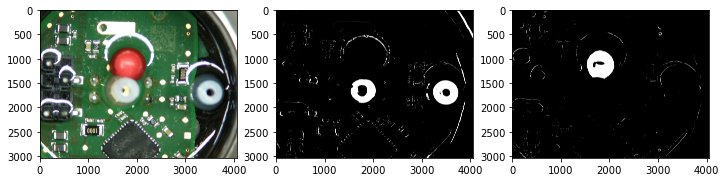

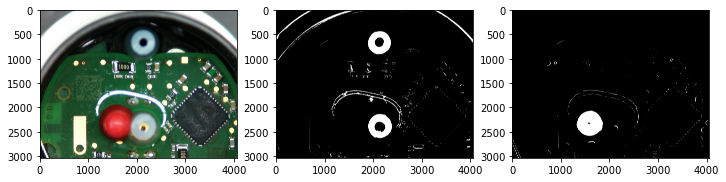

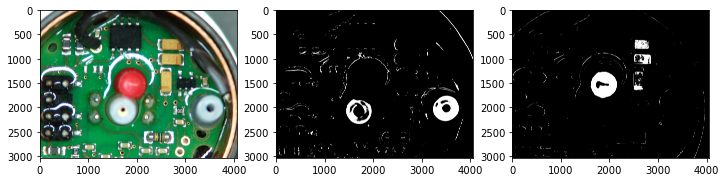

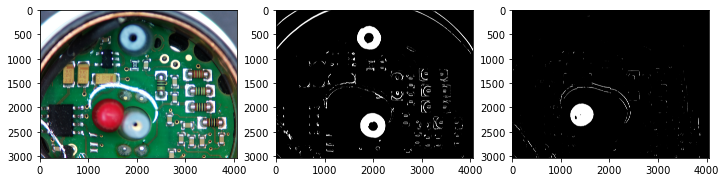

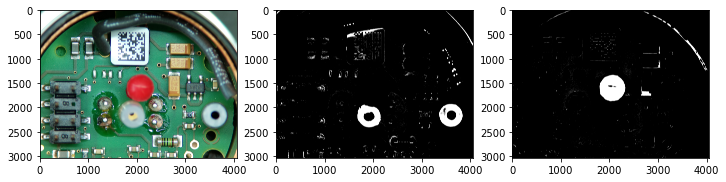

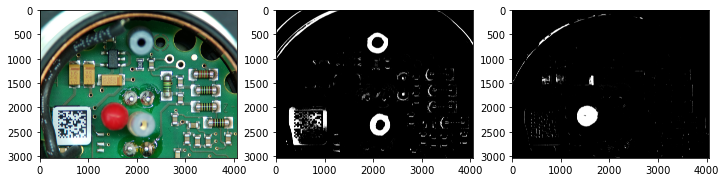

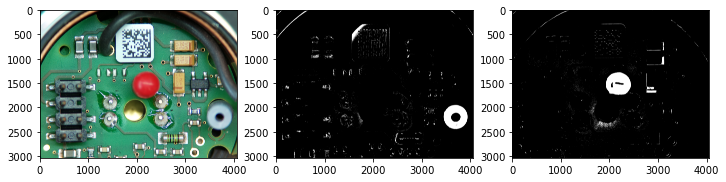

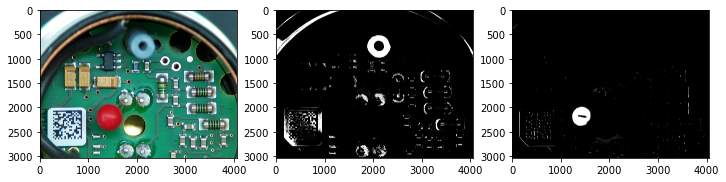

In [101]:
# takes in matched hsv image, returns mask for red lid
def red_lid(hsv_m_img, params):
    mask = cv2.inRange(
        hsv_m_img, 
        (params['low_H'], params['low_S'], params['low_V']), 
        (params['high_H'], params['high_S'], params['high_V'])
    )
    
    return mask

# takes in matched hsv image, returns mask for white lid
# takes in matched hsv image, returns mask for white lid
def white_lid(hsv_m_img, params):
    mask = cv2.inRange(
        hsv_m_img, 
        (params['low_H'], params['low_S'], params['low_V']), 
        (params['high_H'], params['high_S'], params['high_V'])
    )
    
    return mask

# takes in img and reference hsv img, converts to hsv, matches, calls other fns
def red_white_lids(img, ref, w_params, r_params):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)   
    matched_img = match_histograms(img_hsv, ref, channel_axis=-1)
    
    w_mask = white_lid(matched_img, w_params)
    r_mask = white_lid(matched_img, r_params)
    
    return w_mask, r_mask


data_dir_good = 'Filling2/good'
data_dir_bad = 'Filling2/bad'

files_good = os.listdir(data_dir_good)
files_bad = os.listdir(data_dir_bad)

# reading reference image
ref = cv2.imread(os.path.join(data_dir_bad, files_bad[0]))
ref_hsv = cv2.cvtColor(ref, cv2.COLOR_BGR2HSV)


files = [os.path.join(data_dir_good, files_good[i]) for i in range(len(files_good)) 
         if files_good[i][-3:] == 'jpg'] + [os.path.join(data_dir_bad, files_bad[i]) 
                                            for i in range(len(files_bad)) if files_bad[i][-3:] == 'jpg']

white_params = {
    'low_H': 75, 'low_S': 20, 'low_V': 175, 'high_H': 110, 'high_S': 115, 'high_V': 225
}

red_params = {
    'low_H': 0, 'low_S': 140, 'low_V': 180, 'high_H': 180, 'high_S': 255, 'high_V': 255
}

for file in files:
    img = cv2.imread(file)
    
    white_mask, red_mask = red_white_lids(img, ref_hsv, white_params, red_params)
    
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(img[...,::-1])
    axs[1].imshow(white_mask, cmap='gray')
    axs[2].imshow(red_mask, cmap='gray')
    plt.show()

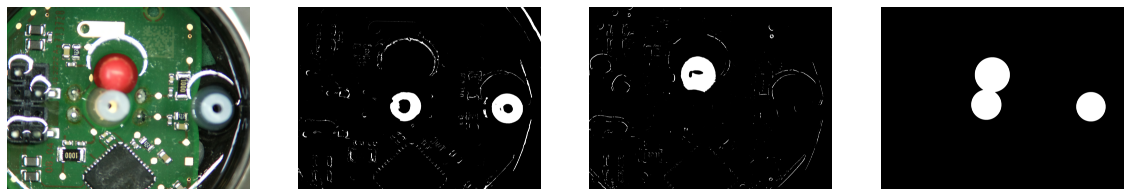

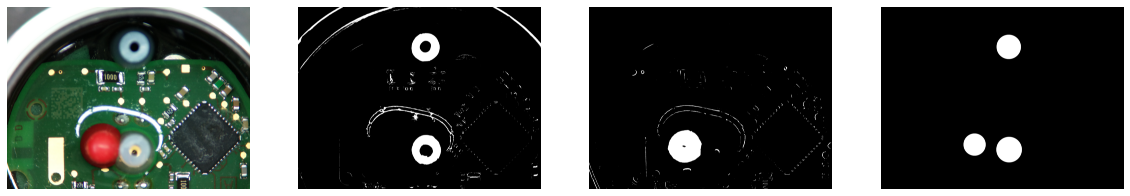

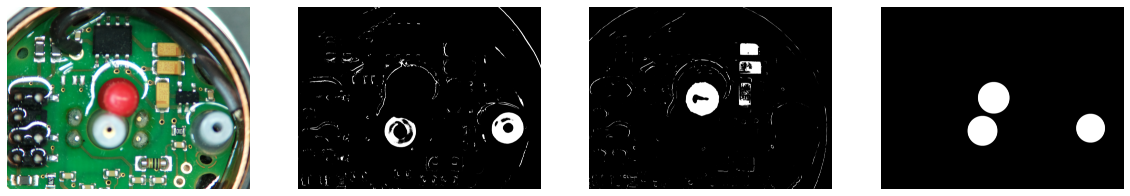

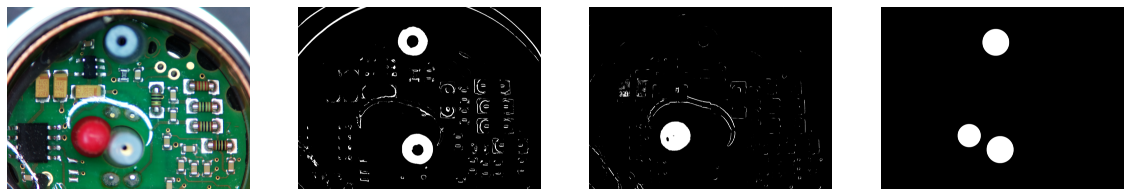

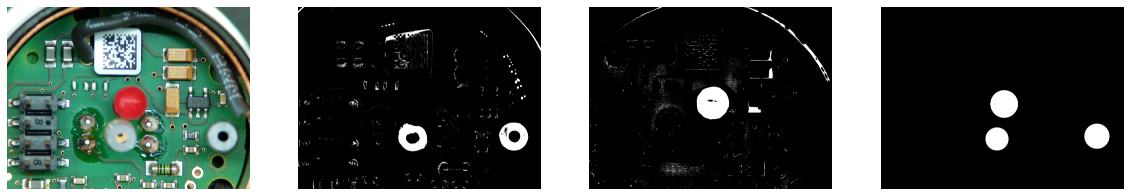

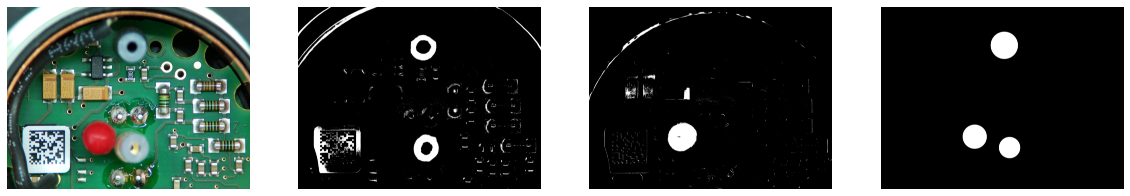

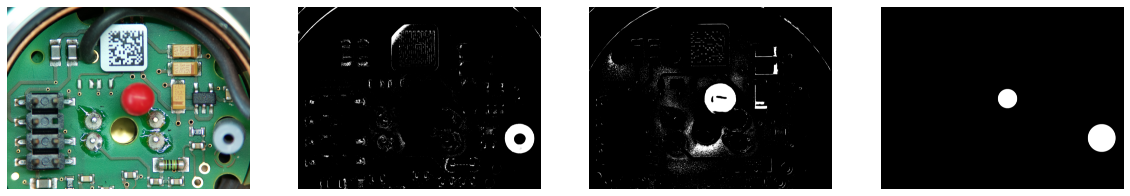

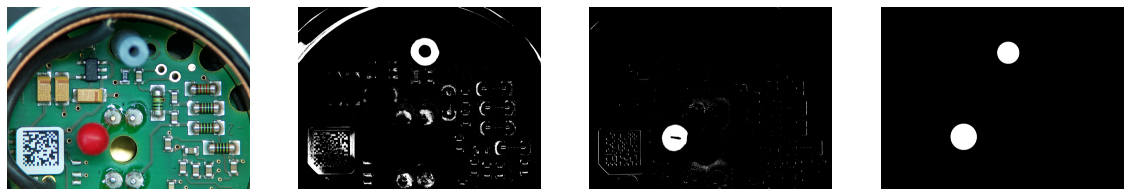

In [189]:
# takes in matched hsv image, returns mask for red lid
def red_lid(hsv_m_img, params):
    mask = cv2.inRange(
        hsv_m_img, 
        (params['low_H'], params['low_S'], params['low_V']), 
        (params['high_H'], params['high_S'], params['high_V'])
    )
    
    return mask

# takes in matched hsv image, returns mask for white lid
# takes in matched hsv image, returns mask for white lid
def white_lid(hsv_m_img, params):
    mask = cv2.inRange(
        hsv_m_img, 
        (params['low_H'], params['low_S'], params['low_V']), 
        (params['high_H'], params['high_S'], params['high_V'])
    )
    
    return mask

# takes in img and reference hsv img, converts to hsv, matches, calls other fns
def red_white_lids(img, ref, w_params, r_params):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)   
    matched_img = match_histograms(img_hsv, ref, channel_axis=-1)
    
    w_mask = white_lid(matched_img, w_params)
    r_mask = white_lid(matched_img, r_params)
    
    return w_mask, r_mask


data_dir_good = 'Filling2/good'
data_dir_bad = 'Filling2/bad'

files_good = os.listdir(data_dir_good)
files_bad = os.listdir(data_dir_bad)

# reading reference image
ref = cv2.imread(os.path.join(data_dir_bad, files_bad[0]))
ref_hsv = cv2.cvtColor(ref, cv2.COLOR_BGR2HSV)


files = [os.path.join(data_dir_good, files_good[i]) for i in range(len(files_good)) 
         if files_good[i][-3:] == 'jpg'] + [os.path.join(data_dir_bad, files_bad[i]) 
                                            for i in range(len(files_bad)) if files_bad[i][-3:] == 'jpg']

white_params = {
    'low_H': 75, 'low_S': 20, 'low_V': 175, 'high_H': 110, 'high_S': 115, 'high_V': 225
}

red_params = {
    'low_H': 0, 'low_S': 140, 'low_V': 170, 'high_H': 180, 'high_S': 255, 'high_V': 255
}

for file in files:
    img = cv2.imread(file)
    
    white_mask, red_mask = red_white_lids(img, ref_hsv, white_params, red_params)
    
    fig, axs = plt.subplots(1, 4, figsize=(20, 4))
    [axi.set_axis_off() for axi in axs.ravel()]
    axs[0].imshow(img[...,::-1])
    axs[1].imshow(white_mask, cmap='gray')
    axs[2].imshow(red_mask, cmap='gray')
#     plt.show()
    
    blank = np.zeros_like(red_mask)

    ret, thresh = cv2.threshold(red_mask, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    area_red = []
    for cnt in contours:
        area_red.append(cv2.contourArea(cnt))
        if np.pi*(100**2) < cv2.contourArea(cnt) < np.pi*(300**2):
            cv2.drawContours(blank, [cnt], 0, 255, -1)
            
    ret, thresh = cv2.threshold(white_mask, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    area_white = []
    for cnt in contours:        
        area_white.append(cv2.contourArea(cnt))
        if np.pi*(100**2) < cv2.contourArea(cnt) < np.pi*(300**2):
            cv2.drawContours(blank, [cnt], 0, 255, -1)
    
    kernel = np.ones((45, 45), np.uint8)
    blank = cv2.erode(blank, kernel, iterations=1)
    
#     axs[3].imshow(blank, cmap='gray')
    
    blank2 = np.zeros_like(red_mask)
    circles = cv2.HoughCircles(blank, cv2.HOUGH_GRADIENT, 1, 200, param1=50,
                              param2=13, minRadius=100, maxRadius=300)
    # ensure at least some circles were found
    if circles is not None:
#         print('Here')
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            blank2 = cv2.circle(blank2, (x, y), r, 255, -1)
    
    axs[3].imshow(blank2, cmap='gray')
    plt.show()
#     break

# change filter and light spectrum

In [118]:
sorted(area)[-5:]

[2438.0, 2783.5, 2911.5, 14788.0, 251779.5]

In [120]:
np.sqrt(251779/np.pi)

283.0967057976278

In [125]:
    print(True)

True


In [ ]:
|